### Contents
##### 1.0 IMPORTING LIBRARIES
##### 2.0 IMPORTING THE DATASET¶
##### 3.0 USE OF FOR - LOOP TO GROUP THE STATE INTO REGIONS
##### 4.0 Creating crosstab
##### 5.0 importing the transpose departemnt dataset
##### 6.0 Grouping of the product by price 
##### 7.0 Product price grouping pie chart

### 1.0. IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 2.0. IMPORTING THE DATASET

In [6]:
df = pd.read_pickle('/Users/shaqurcasco/Downloads/CF9_ords_prods_cus.pkl')

In [7]:
df.head(2)

,order_id,user_id,eval_set,order_number,order_days_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,First Name,Last Name,Gender,State,Age,date_joined,No_of_dependants,family_status,income,_merge
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [ ]:
Creating dataframe with missing data 'Median_customers'
df_nan=df[df['Median_customers'].isnull()==True]

In [4]:
# checking the dataset for null 
df.isnull().sum()

order_id                         0
user_id                          0
eval_set                         0
order_number                     0
order_days_of_the_week           0
order_hour_of_day                0
days_since_prior_order     1962703
product_id                       0
add_to_cart_order                0
reordered                        0
product_name                     0
aisle_id                         0
department_id                    0
prices                           0
price_range_loc           19949247
Busiest day                      0
Busiest days                     0
Hour_of_day                      0
max_order                        0
loyalty_flag                     0
Average_spender                  0
spending_flag                    0
Median_customers                 5
frequency_flag                   0
First Name                       0
Last Name                        0
Gender                           0
State                            0
Age                 

In [5]:
#The median customers with null is becuase there order is not more than one and the median can not be calculated, 
df.fillna({'Median_customers': 1}, inplace=True)

In [6]:
#drop the column 
df.drop(columns = ['price_range_loc', 'First Name', 'Last Name', '_merge'], inplace = True)

In [7]:
#checking the column after dropping columns
df.isnull().sum()

order_id                        0
user_id                         0
eval_set                        0
order_number                    0
order_days_of_the_week          0
order_hour_of_day               0
days_since_prior_order    1962703
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
prices                          0
Busiest day                     0
Busiest days                    0
Hour_of_day                     0
max_order                       0
loyalty_flag                    0
Average_spender                 0
spending_flag                   0
Median_customers                0
frequency_flag                  0
Gender                          0
State                           0
Age                             0
date_joined                     0
No_of_dependants                0
family_status                   0
income        

#### for the purpose of data protection , the personally identifiable information (PII) which is the names (first and names)was excluded to prevent potential trace back to the person with the names.

### 3.0. USE OF FOR - LOOP TO GROUP THE STATE INTO REGIONS

In [8]:
Result = []
    
for value in df['State']:
    if value in ['Maine,' 'New' 'Hampshire' 'Vermont' 'Massachusetts' 'Rhode Island', 'Connecticut','New York','Pennsylvania','New Jersey']:
        Result.append('Northeast_Region')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        Result.append('Midwest_Region')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        Result.append('South_Region')
    else:
        Result.append('West_Region')
    

In [9]:
#Passing the result into the new created column 'Region'
df['Region'] = Result

In [10]:
# checking the dataframe if the new column 'Region' was properly append
df.head(4)

,order_id,user_id,eval_set,order_number,order_days_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,Median_customers,frequency_flag,Gender,State,Age,date_joined,No_of_dependants,family_status,income,Region
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South_Region
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South_Region
2,473747,1,prior,3,3,12,21.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South_Region
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South_Region


In [11]:
#checking the freuency numbers of each regions 
df['Region'].value_counts(dropna = False)

West_Region         10837832
South_Region        10198982
Midwest_Region       7176924
Northeast_Region     2416003
Name: Region, dtype: int64

In [14]:
#checking the columns 
df.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number',
       'order_days_of_the_week', 'order_hour_of_day', 'days_since_prior_order',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'Busiest day', 'Busiest days',
       'Hour_of_day', 'max_order', 'loyalty_flag', 'Average_spender',
       'spending_flag', 'Median_customers', 'frequency_flag', 'Gender',
       'State', 'Age', 'date_joined', 'No_of_dependants', 'family_status',
       'income', 'Region'],
      dtype='object')

### 4.0 Creating crosstab 

In [15]:
#creating cross tab for region and spending flag
crosstab = pd.crosstab(df['Region'], df['spending_flag'], dropna = False)
crosstab

spending_flag,High spender,Low spender
Region,,
Midwest_Region,149817,7027107
Northeast_Region,40697,2375306
South_Region,196523,10002459
West_Region,208526,10629306


In [25]:
# Low-activity customers excluded from the dataframe
df_value_cus = df[df['max_order'] >= 5]

In [26]:
#checking the columns and rows 
df_value_cus.shape

(29270938, 31)

### 5.0  importing the transpose departemnt dataset

In [12]:
#importing  dataset
df_dept = pd.read_csv('/Users/shaqurcasco/Downloads/ Instacart Basket June: 26: 2023 CF/3 SCRIPT/CF Achievement 4/department_wrangling.csv')

In [19]:
df_dept.head(3)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery


In [20]:
#renaming the Unnamed to department_id
df_dept.rename(columns = {'Unnamed: 0':'department_id'}, inplace = True)

In [21]:
df_dept.head(3)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery


In [22]:
### Merging of the df and department dataframe
df_merged = df.merge(df_dept, on =['department_id'], indicator = True )

In [32]:
#checking the columns and shape 
df_merged.shape

(30629741, 33)

In [33]:
# calculating the statistics of the department dataframe
df_merged['Age'].describe()

count    3.062974e+07
mean     4.947348e+01
std      1.847859e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [35]:
#sorting  the agec column from the lowest to the highest age 
df_merged['Age'].value_counts().sort_index()

18    472863
19    491977
20    478887
21    485541
22    483586
       ...  
77    474757
78    471533
79    498415
80    482775
81    478367
Name: Age, Length: 64, dtype: int64

In [23]:
# Grouping of age 
df_merged.loc[(df_merged['Age'] < 35), 'age_group'] = 'Young Adult'
df_merged.loc[(df_merged['Age'] >= 35) & (df_merged['Age'] < 65), 'age_group'] = 'Middle-Aged'
df_merged.loc[df_merged['Age'] >= 65, 'age_group'] = 'Senior'

In [37]:
# checking the frequency of the age-group
df_merged['age_group'].value_counts()

Middle-Aged    14392922
Young Adult     8139248
Senior          8097571
Name: age_group, dtype: int64

In [38]:
#checking the rows and columns of the dataframe after adding the new column 'age-group'
df_merged.shape

(30629741, 34)

In [39]:
# checking the descriptive statistics of the income
df_merged['income'].describe()

count    3.062974e+07
mean     9.945980e+04
std      4.306626e+04
min      2.590300e+04
25%      6.706600e+04
50%      9.661200e+04
75%      1.279340e+05
max      5.939010e+05
Name: income, dtype: float64

###### The income ranges from 25k US-Dollars to 594k US Dollars, and the average income of the customers is 99k US Dollars
#####  The Grouping of incoming was done as following :
    
######    FROM MIN INCOME 25K TO FIRST QUARTILE <68K USD =  < 68K USD
######  ABOVE FIRST QUARTILE >= 68K TO 3RD QUARTILE < 128 USD = >= 68K - < 128 USD
######  ABOVE THIRD QUARTILE >= 128 

In [24]:
#grouping of income
df_merged.loc[df_merged['income'] < 68000, 'income_Range']  = '25k-68k' 
df_merged.loc[(df_merged['income'] >= 68000) & (df_merged['income'] < 128000), 'income_Range'] = '68k-128k'
df_merged.loc[df_merged['income'] >= 128000, 'income_Range']  = '128k'


In [42]:
# checking the frequency of the income_range
df_merged['income_Range'].value_counts()

68k-128k    15063447
25k-68k      7919442
128k         7646852
Name: income_Range, dtype: int64

In [43]:
#checking the rows and columns of the dataframe after adding the new column 'age-income'
df_merged.shape

(30629741, 35)

In [44]:
# statistis description of the number of dependant
df_merged['No_of_dependants'].describe()

count    3.062974e+07
mean     1.501712e+00
std      1.118467e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: No_of_dependants, dtype: float64

In [45]:
# checking the frequency of the no of dependants
df_merged['No_of_dependants'].value_counts()

3    7680036
2    7656940
0    7649698
1    7643067
Name: No_of_dependants, dtype: int64

In [25]:
# crosstab between family status and no of dependant 
df_family_dependant = pd.crosstab(df_merged['family_status'], df_merged['No_of_dependants'], dropna = True)

In [26]:
df_family_dependant

No_of_dependants,0,1,2,3
family_status,,,,
divorced/widowed,2629966,0,0,0
living with parents and siblings,0,508378,479566,482888
married,0,7134689,7177374,7197148
single,5019732,0,0,0


##### The divorced/widowed AND single did not have any dependants but the married have more dependants than the living with parents and siblings.

##### 0 represent no dependant and above 0 represent (1,2,3) Dependant

In [27]:
# creating dependant flag 
df_merged.loc[df_merged['No_of_dependants'] == 0, 'Dependants'] = 'No_dependant'
df_merged.loc[df_merged['No_of_dependants'] > 0, 'Dependants'] = 'Dependant'

In [32]:
df_merged.to_pickle('/Users/shaqurcasco/Downloads/ Instacart Basket June: 26: 2023 CF/3 SCRIPT/CF Achievement 4/CF_10_1_df_merged.pkl')

In [49]:
# Frequency of the dependants
df_merged['Dependants'].value_counts()

Dependant       22980043
No_dependant     7649698
Name: Dependants, dtype: int64

In [ ]:
### 6.0 Product price grouping

In [22]:
# grouping of the product by price , when price is > 15 then high range price 
df.loc[df['prices'] > 15, 'price_range'] = 'High-range product'

In [23]:
# grouping of the product by price , when price is <=15 and > 5 then mid range price 
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range'] = 'Mid-range product' 

In [24]:
# grouping of the product by price , when price is <= 5 then low range price 
df.loc[df['prices'] <= 5, 'price_range'] = 'Low-range product'

In [25]:
df['price_range'].value_counts()

price_range
Mid-range product     20664075
Low-range product      9570200
High-range product      395466
Name: count, dtype: int64

### 7.0 Product price grouping pie chart

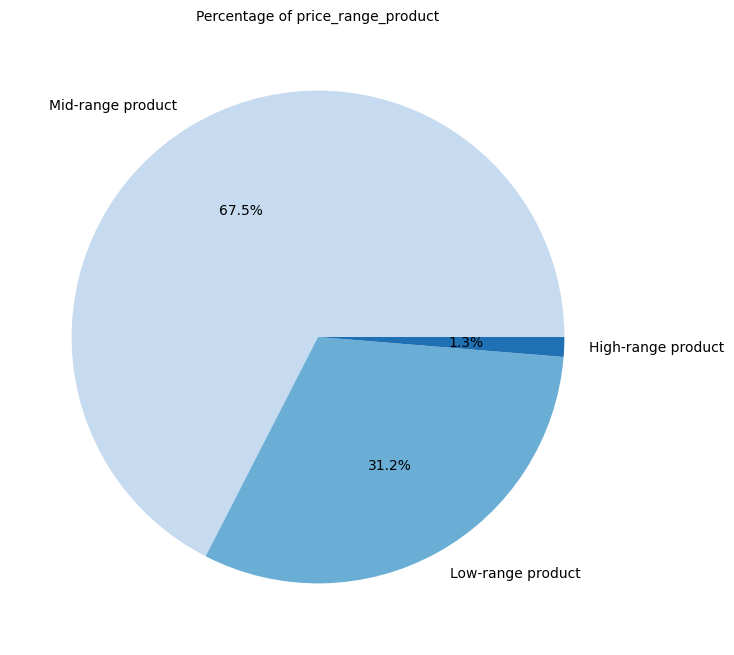

In [27]:
#Age #pie chart Visualization
pie_price_range = df['price_range'].value_counts().plot.pie(figsize = (8,8), colors = sns.color_palette('Blues', 3), autopct = '%1.1f%%')
plt.ylabel('')
plt.title('Percentage of price_range_product',fontsize=10)
plt.show()

In [28]:
#saving the pie chart 
pie_price_range.figure.savefig('/Users/shaqurcasco/Downloads/price_range.png')